<a href="https://colab.research.google.com/github/datadigger01/inter_trade/blob/master/Python_practice6(MLP_housingprice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP(Multi-Layer Perceptron) Model

## 1. import for MLP

In [ ]:
# Neural Network
import numpy as np
import pandas as pd

## 2. Housing Price Data Import

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI와무역투자론/Data/BostonHousing.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [ ]:
# predicators & target
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
label = ['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

# Split Data for MultiLayerPerceptron(MLP)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.20, random_state=365)
X_train
#y_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28
171,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403,14.7,348.13,12.03
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
471,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
180,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56


+ definde feature / label

In [ ]:
print(X_train.shape)
print("The number of instance for training:", X_train.shape[0])
print("The number of input variables:", X_train.shape[1])

(404, 13)
The number of instance for training: 404
The number of input variables: 13


## 3. Define Neural Net(MLP) in Keras

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential


# define model
model = Sequential()
model.add(layers.Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 70        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Fit model

In [ ]:
#model.fit(X, y, epochs=100, verbose=0)
history = model.fit(X_train, y_train, epochs=30, verbose=0)

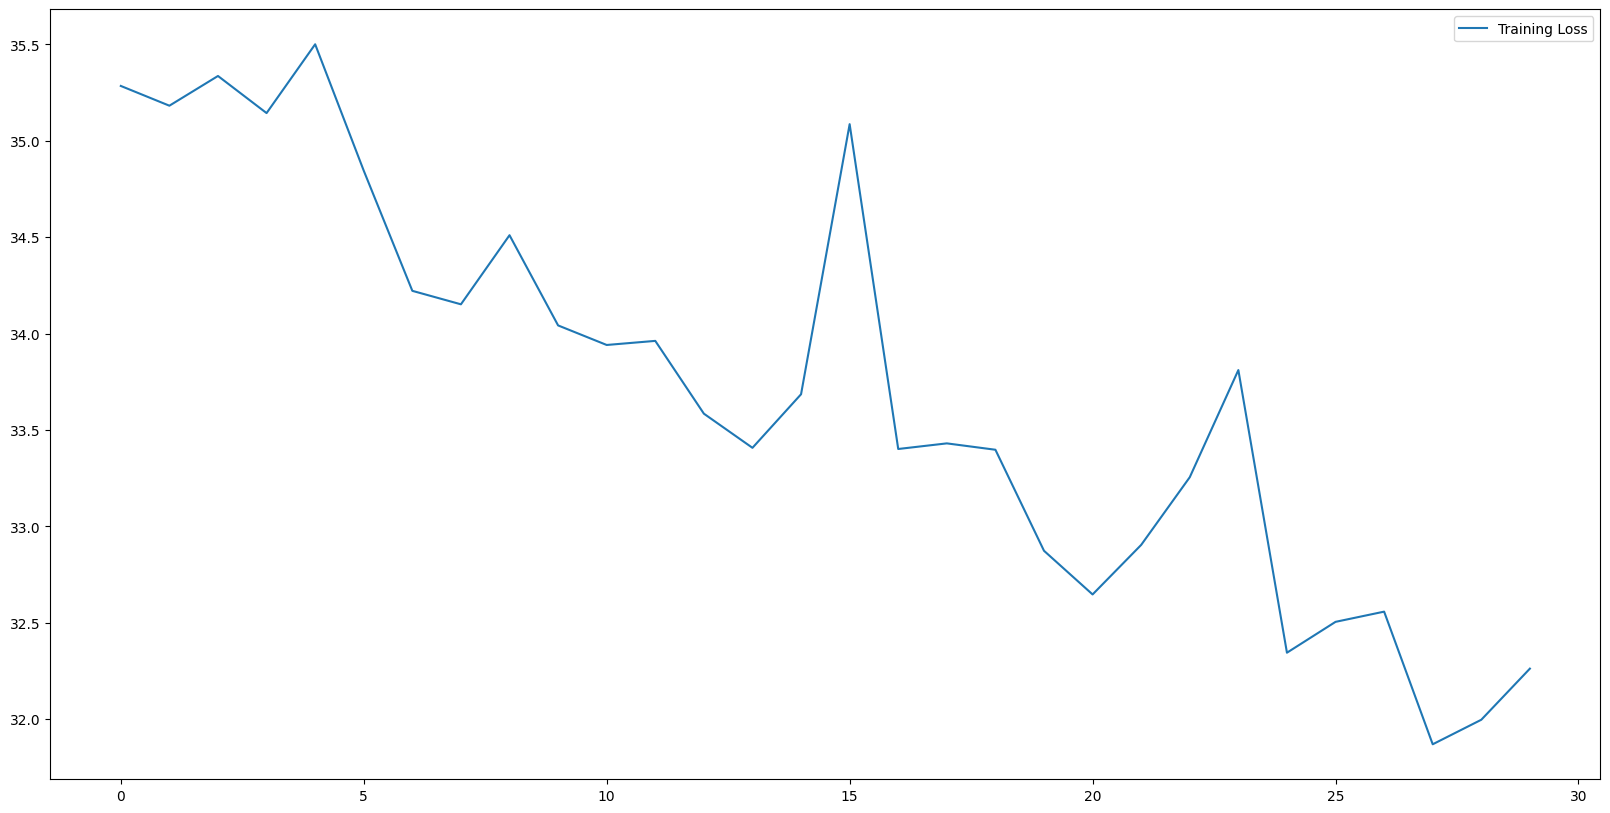

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


array([[21.747253 ],
       [22.21238  ],
       [32.25489  ],
       [30.961662 ],
       [30.751434 ],
       [21.39891  ],
       [ 9.7979   ],
       [14.299285 ],
       [22.667252 ],
       [32.379646 ],
       [34.922554 ],
       [31.76389  ],
       [13.844352 ],
       [19.540405 ],
       [27.425285 ],
       [ 2.0586066],
       [ 8.805947 ],
       [23.08091  ],
       [12.690978 ],
       [ 3.4323955],
       [30.761442 ],
       [24.4665   ],
       [18.873138 ],
       [25.175678 ],
       [18.566216 ],
       [13.24034  ],
       [14.835952 ],
       [11.414016 ],
       [24.787247 ],
       [25.343529 ],
       [28.69065  ],
       [ 5.400286 ],
       [22.693687 ],
       [29.562439 ],
       [13.906566 ],
       [18.801693 ],
       [10.846995 ],
       [20.427197 ],
       [30.035877 ],
       [10.1566   ],
       [21.375832 ],
       [19.278053 ],
       [16.342184 ],
       [19.753052 ],
       [32.450584 ],
       [10.068156 ],
       [16.391266 ],
       [25.33

# 5.Result

In [ ]:
#print("Lasso Reg --> intercept:{}, coef:{}".format(lasso_clf.intercept_, lasso_clf.coef_))
predicted_MEDV=pd.DataFrame(data=model.predict(X_test),columns=['forecasted_MEDV'])
real_value = y_test.reset_index()

result = pd.concat([real_value,predicted_MEDV], axis=1)
result

4/4 [==============================] - 0s 3ms/step


,index,MEDV,forecasted_MEDV
0,152,15.3,21.747253
1,482,25.0,22.212379
2,232,41.7,32.254890
3,225,50.0,30.961662
4,189,34.9,30.751434
...,...,...,...
97,14,18.2,22.278923
98,249,26.2,23.808640
99,12,21.7,18.130104
100,235,24.0,22.848595


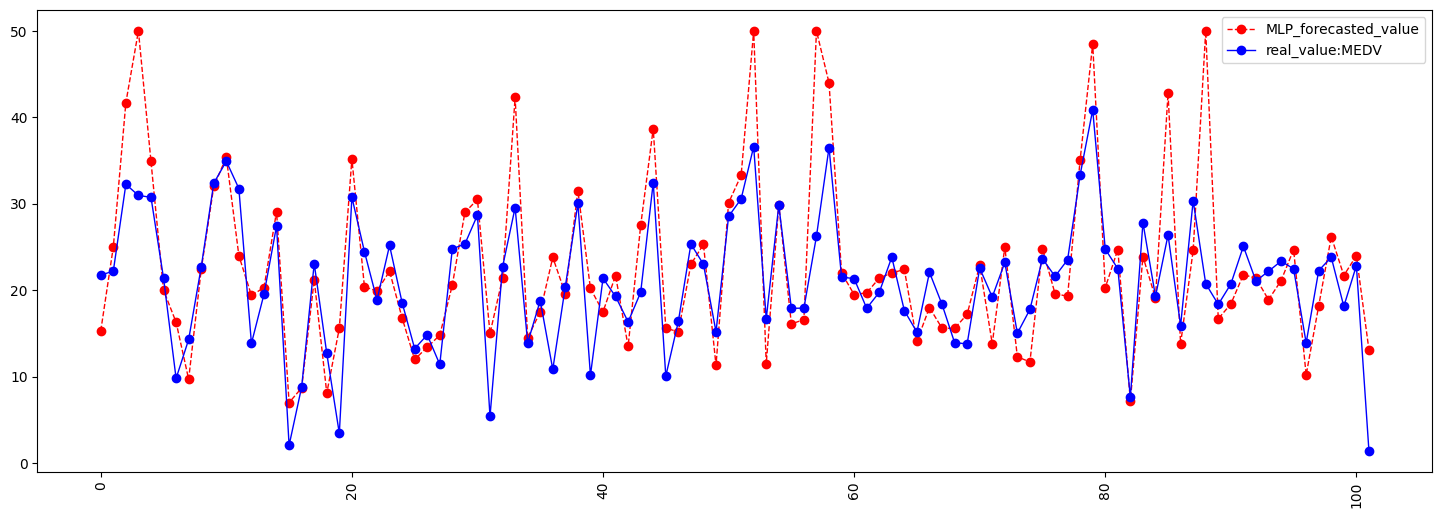

In [ ]:
plt.figure(figsize=(18,6))

# 예측값 Plot
plt.plot(result['MEDV'], marker='o',markersize=6,color='red', linestyle='dashed', linewidth=1,label='MLP_forecasted_value')

# 예측된 결과값 Plot
plt.plot(result['forecasted_MEDV'], marker='o',markersize=6,color='blue',linewidth=1,label='real_value:MEDV' )

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
MAE = mean_absolute_error(result['MEDV'], result['forecasted_MEDV'])
MAPE = mean_absolute_percentage_error(result['MEDV'], result['forecasted_MEDV'])
RMSE = mean_squared_error(result['MEDV'], result['forecasted_MEDV'])**0.5
MSE = mean_squared_error(result['MEDV'], result['forecasted_MEDV'])


print(f"MAE -> {MAE:2.4f}")
print(f"MSE -> {MSE:2.4f}")
print(f"RMSE -> {RMSE:2.4f}")

print(f"MAPE -> {MAPE:2.4f}")


MAE -> 4.2792
MSE -> 41.1422
RMSE -> 6.4142
MAPE -> 0.1964
